# Bank Marketing Classification

In this part of the assignment we want to do a classification task using PyTorch on bank marketing dataset.

#Import Library

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

#Load Dataset
Here, you should download and load the dataset. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [6]:
df = pd.read_csv('bank-full.csv', delimiter=';')

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

X = df.drop('y', axis=1).values
y = df['y'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Data loaders created successfully.")

Data loaders created successfully.


#Normalize data
normalize numerical data.

In [7]:
# Normalize numerical data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create Data Loader
create data loader for pytorch

In [8]:
# PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# TensorDataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f'Train set size: {len(train_dataset)}')
print(f'Validation set size: {len(val_dataset)}')
print(f'Test set size: {len(test_dataset)}')

Train set size: 27126
Validation set size: 9042
Test set size: 9043


#Model
define your model in here

In [27]:
class BankMarketingNet(nn.Module):
    def __init__(self):
        super(BankMarketingNet, self).__init__()
        self.fc1 = nn.Linear(in_features=16, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=32)
        self.fc4 = nn.Linear(in_features=32, out_features=2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

#Train your model
Define `criterion` and `optimizer`.
Train your model

Tasks:
- [ ] Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Validation loss
- [ ] save train/validation loss (of each epoch) in an array for later usage

In [28]:
learning_rate = 0.001
batch_size = 64
num_epochs = 20

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = BankMarketingNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for inputs, targets in tqdm.tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for inputs, targets in tqdm.tqdm(val_loader, desc='Validation'):
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

train_losses = np.array(train_losses)
val_losses = np.array(val_losses)

Validation: 100%|██████████| 142/142 [00:00<00:00, 1166.20it/s]


Epoch 1/20: Train Loss: 0.2854, Validation Loss: 0.2375


Validation: 100%|██████████| 142/142 [00:00<00:00, 1179.18it/s]


Epoch 2/20: Train Loss: 0.2531, Validation Loss: 0.2344


Validation: 100%|██████████| 142/142 [00:00<00:00, 1115.51it/s]


Epoch 3/20: Train Loss: 0.2461, Validation Loss: 0.2318


Validation: 100%|██████████| 142/142 [00:00<00:00, 1096.58it/s]


Epoch 4/20: Train Loss: 0.2415, Validation Loss: 0.2319


Validation: 100%|██████████| 142/142 [00:00<00:00, 1129.16it/s]


Epoch 5/20: Train Loss: 0.2415, Validation Loss: 0.2340


Validation: 100%|██████████| 142/142 [00:00<00:00, 1215.10it/s]


Epoch 6/20: Train Loss: 0.2392, Validation Loss: 0.2294


Validation: 100%|██████████| 142/142 [00:00<00:00, 753.56it/s]


Epoch 7/20: Train Loss: 0.2378, Validation Loss: 0.2282


Validation: 100%|██████████| 142/142 [00:00<00:00, 709.37it/s]


Epoch 8/20: Train Loss: 0.2359, Validation Loss: 0.2276


Validation: 100%|██████████| 142/142 [00:00<00:00, 1237.50it/s]


Epoch 9/20: Train Loss: 0.2340, Validation Loss: 0.2293


Validation: 100%|██████████| 142/142 [00:00<00:00, 1101.05it/s]


Epoch 10/20: Train Loss: 0.2336, Validation Loss: 0.2265


Validation: 100%|██████████| 142/142 [00:00<00:00, 1124.68it/s]


Epoch 11/20: Train Loss: 0.2333, Validation Loss: 0.2255


Validation: 100%|██████████| 142/142 [00:00<00:00, 1033.58it/s]


Epoch 12/20: Train Loss: 0.2304, Validation Loss: 0.2250


Validation: 100%|██████████| 142/142 [00:00<00:00, 1198.05it/s]


Epoch 13/20: Train Loss: 0.2304, Validation Loss: 0.2244


Validation: 100%|██████████| 142/142 [00:00<00:00, 1095.33it/s]


Epoch 14/20: Train Loss: 0.2294, Validation Loss: 0.2245


Validation: 100%|██████████| 142/142 [00:00<00:00, 1179.98it/s]


Epoch 15/20: Train Loss: 0.2290, Validation Loss: 0.2253


Validation: 100%|██████████| 142/142 [00:00<00:00, 1183.75it/s]


Epoch 16/20: Train Loss: 0.2282, Validation Loss: 0.2240


Validation: 100%|██████████| 142/142 [00:00<00:00, 729.79it/s]


Epoch 17/20: Train Loss: 0.2254, Validation Loss: 0.2253


Validation: 100%|██████████| 142/142 [00:00<00:00, 769.54it/s]


Epoch 18/20: Train Loss: 0.2248, Validation Loss: 0.2240


Validation: 100%|██████████| 142/142 [00:00<00:00, 1065.37it/s]


Epoch 19/20: Train Loss: 0.2244, Validation Loss: 0.2225


Validation: 100%|██████████| 142/142 [00:00<00:00, 1134.47it/s]

Epoch 20/20: Train Loss: 0.2225, Validation Loss: 0.2232


### Visualize Loss plot

Using the arrays that you have (from previous task in the above section), visualize Loss plot (train and validation together)

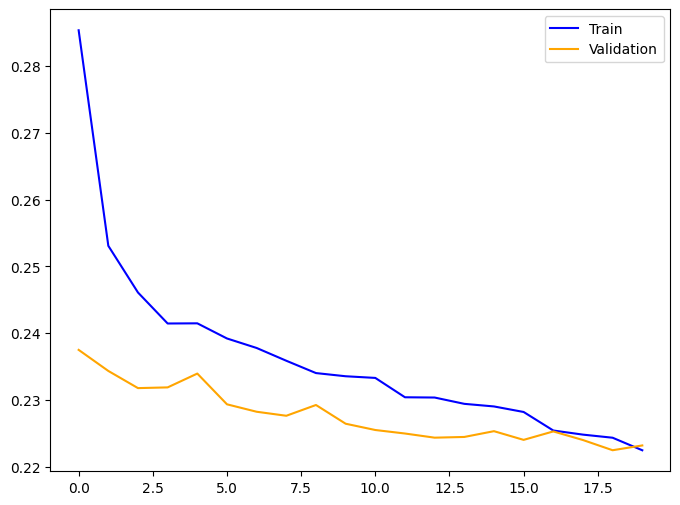

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Train', color='blue')
plt.plot(val_losses, label='Validation', color='orange')
plt.legend()
plt.show()


## Evaluation

Test your trained model (using the Test Dataloader that you have).

In [32]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in tqdm.tqdm(test_loader, desc='Testing'):
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy}%')


Testing: 100%|██████████| 142/142 [00:00<00:00, 1065.46it/s]

Accuracy: 90.02543403737698%
